# Etivity 2

## Student Name: Garret Molloy
## Student ID: 9021906

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [2]:
# Testing code for Managing Outliers

# Replacing outliers using a percentile method 
# Remove values which are outside the 5th and 95th percentile

np.random.seed(0)
nb_sample = 100
num_sample = (0,100)

d = dict()
d['User_id'] = np.random.randint(num_sample[0], num_sample[1], nb_sample)
for i in range(5):
    d['Col' + str(i)] = np.random.randint(num_sample[0], num_sample[1], nb_sample)

df = DataFrame.from_dict(d)

df.head(25)

,User_id,Col0,Col1,Col2,Col3,Col4
0,44,49,31,93,53,39
1,47,69,13,84,58,24
2,64,41,71,2,43,58
3,67,35,56,69,55,36
4,67,64,24,12,18,99
5,9,95,79,44,45,69
6,83,69,41,66,87,6
7,21,94,18,91,65,3
8,36,0,40,85,70,98
9,87,50,54,39,53,40


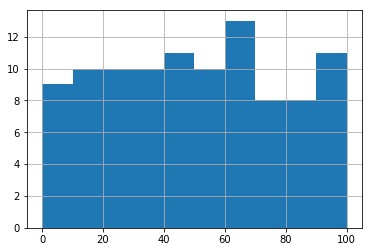

In [3]:
df['Col0'].hist(range=(0,100),bins=10)

In [4]:
filt_df = df.loc[:, df.columns != 'User_id'] # remove UserId not needd to smooth

low = .05
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)


filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)



       Col0   Col1  Col2   Col3   Col4
0.05   2.00   3.00   6.9   3.95   4.00
0.95  95.05  89.05  93.0  94.00  97.05


In [5]:
filt_df.head(25)

,Col0,Col1,Col2,Col3,Col4
0,49.0,31.0,93.0,53.0,39.0
1,69.0,13.0,84.0,58.0,24.0
2,41.0,71.0,NaN,43.0,58.0
3,35.0,56.0,69.0,55.0,36.0
4,64.0,24.0,12.0,18.0,NaN
5,95.0,79.0,44.0,45.0,69.0
6,69.0,41.0,66.0,87.0,6.0
7,94.0,18.0,91.0,65.0,NaN
8,NaN,40.0,85.0,70.0,NaN
9,50.0,54.0,39.0,53.0,40.0


In [6]:
filt_df = pd.concat([df.loc[:,'User_id'], filt_df], axis=1)

In [7]:
# In this example the outside percentile values have the whole record dropped...

# filt_df.dropna(inplace=True)

# Another alternate is to replace with mod, mean or Median

# Had to add iinplace=True to update the datafrae
# added round(x,1) to redcuce the floating point 
filt_df.fillna(round(filt_df.mean(),1), inplace=True)

print(filt_df.head(25))

    User_id  Col0  Col1  Col2  Col3  Col4
0        44  49.0  31.0  93.0  53.0  39.0
1        47  69.0  13.0  84.0  58.0  24.0
2        64  41.0  71.0  54.1  43.0  58.0
3        67  35.0  56.0  69.0  55.0  36.0
4        67  64.0  24.0  12.0  18.0  56.0
5         9  95.0  79.0  44.0  45.0  69.0
6        83  69.0  41.0  66.0  87.0   6.0
7        21  94.0  18.0  91.0  65.0  56.0
8        36  48.0  40.0  85.0  70.0  56.0
9        87  50.0  54.0  39.0  53.0  40.0
10       70  36.0  79.0  39.0  48.0  60.0
11       88  34.0  11.0  75.0  94.0  33.0
12       88  48.0  38.0  22.0  59.0  28.0
13       12  93.0  44.3  30.0  80.0  68.0
14       58   3.0  44.3  17.0  26.0  26.0
15       65  48.0  44.3  70.0  35.0  96.0
16       39  42.0  44.0  71.0  58.0  51.0
17       87  77.0  88.0  18.0  49.0  73.0
18       46  21.0  24.0  92.0  73.0  53.0
19       88  73.0  67.0  43.0  44.0  69.0
20       81  48.0  82.0  83.0  13.0  33.0
21       37  10.0   3.0  49.0  70.0   7.0
22       25  43.0  76.0  41.0  38.

In [8]:
filt_df.describe()

,User_id,Col0,Col1,Col2,Col3,Col4
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,48.230000,48.020000,44.257000,54.059000,48.485000,55.990000
std,28.372292,25.537843,23.241639,25.789502,25.210373,25.835726
min,0.000000,2.000000,3.000000,7.000000,4.000000,4.000000
25%,23.000000,28.500000,29.000000,32.000000,26.750000,36.000000
50%,47.000000,48.000000,43.500000,54.100000,48.500000,56.000000
75%,74.250000,67.000000,61.000000,75.000000,68.500000,77.250000
max,99.000000,95.000000,89.000000,93.000000,94.000000,97.000000


# Task 1 Fill in the Missing Values

First I will locate the missing values. Then decide after seom profiling the best moethod to fill in the missing data.
Removal of records or attributes coudl also be an option.


In [124]:
df = pd.read_csv('bank_et2.csv')
df_orig = df

##### Examine the first few data rows and the last few data rows. 

In [125]:
# Print first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [126]:
# Print last 5 rows of the dataframe
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Even in this small sample I can see that education is NaN for recird 1995 - which is a missing value.

In [127]:
# Drop Unamed Column as it is just an ID 
del df['Unnamed: 0']

# Print statistical summary for all numerical attributes
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


age           12
job           10
education    104
contact      191
poutcome     454
dtype: int64


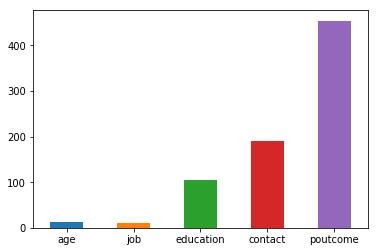

In [128]:
# With 2,000 records, we want to see how many have non zero or missing values.

# Count number of each attribute, subtract from total records to determine number of missing vlaues
count_nan = len(df) - df.count()

# List only the attibutes with missing values
missing = count_nan[count_nan!=0]

print(missing)

missing.index.tolist()
missing.plot.bar(rot=0)
plt.show()

So we have 2000 records. But some features have missing or blank entries.

The folowing attributes have missing values:
- age (12 missing - very few)
- job (10 missing - very few)
- education (114 missing - significant)
- contact (191 missing - significant)
- poutcome (454 missing - a lot, almost 25%!!)

Now to fill in missing values I must understand the types and ranges of these values for each attribute, that I can better understand the options for filling in missing values.

Options include:

__Removal__
- If the total records for an attribute is very small, simply deleting the record is an option
- If an attribute has very few many records with missing values, the attribute may be dropped from the records

__Replacement__
- For categorical Values, if there are many missing values we can create a new category called 'unknown' or 'unspecified' to capture this phenomenon
- For numerical values, we can replace with 0, with a mean or a median or the mode, with a lot of values we don't want to affect the statistical standard deviation
- We can check, using correlation, which attributes inform us about the missing value and impute a suitable one with a linear or logistic regresion


In [129]:
# Handle Missing Values for Age

# First let's profile the age spread 
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [130]:
# There is only 12 missing ages, we could just remove these records or replace witht the mean

# Remving these 12 records
df = df[df['age']>0]

count_nan = len(df) - df.count()

# List only the attibutes with missing values
missing = count_nan[count_nan!=0]

print(missing)

job           10
education    104
contact      191
poutcome     453
dtype: int64


management       458
technician       347
blue-collar      297
admin.           246
services         164
retired          161
student           95
unemployed        69
self-employed     61
entrepreneur      45
housemaid         35
NaN               10
Name: job, dtype: int64


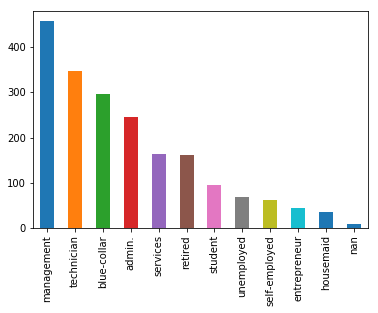

In [131]:
# Handle Missing values for 'job'
jobs = df['job'].value_counts(dropna=False)
print(jobs)
jobs.index.tolist()
jobs.plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

There are so few missing jobs, rather than add a category for "unknown" we can just  use the most popular job - "management".

Alternately we can see if there is a relationship with job title and other variables. 
To do this we need to create a __correlation matrix__

If we find a correlation we can more confidently replace the value with that indicated by another variable.

If we were replacing more than just 10 missing values, it would be important not to affect the total sample averages and replace in the same percenatge as those found in the known values.


But first we must change our categorical values to numeric ones.

- For attibutes with more than 2 categories, we will need to create dummies.
- For attributes with just 2 categories we can convert fromtext to 0 and 1

In [151]:
# Calcualte the number of categories for each varible
def attribute_stats(list): 
    for x in list:
        records = df[x].count()
        blank_records = 2000 - records
        print("\n ==== " + x + " - " + str(records) + " records (" + str(blank_records) + " blank) ====")
        print(df[x].value_counts())
        #print(df[x].value_counts(normalize=True))
    
attribute_stats(["job","marital", "education", "default", "housing", "loan", "contact", "poutcome", "subscribed", "month"])


 ==== job - 1978 records (22 blank) ====
management       458
technician       347
blue-collar      297
admin.           246
services         164
retired          161
student           95
unemployed        69
self-employed     61
entrepreneur      45
housemaid         35
Name: job, dtype: int64
management       0.231547
technician       0.175430
blue-collar      0.150152
admin.           0.124368
services         0.082912
retired          0.081395
student          0.048028
unemployed       0.034884
self-employed    0.030839
entrepreneur     0.022750
housemaid        0.017695
Name: job, dtype: float64

 ==== marital - 1988 records (12 blank) ====
married     1103
single       670
divorced     215
Name: marital, dtype: int64
married     0.554829
single      0.337022
divorced    0.108149
Name: marital, dtype: float64

 ==== education - 1884 records (116 blank) ====
secondary    991
tertiary     677
primary      216
Name: education, dtype: int64
secondary    0.526008
tertiary     0.359342

From this exercise we can see the following are 2 category attributes:
- default
- housing
- loan
- contact
- subscribed


In [133]:
# Convert these 2 category attributes to 1 and 0 to aid correlation

df['default'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
df['housing'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
df['loan'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
df['contact'].replace(to_replace=['cellular', 'telephone'], value=[0, 1],inplace=True)
df['subscribed'].replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)

D:\Python\Miniconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [134]:
# Covert Month 3 letter to number
df['month'].replace(to_replace=['jan', 'feb', 'mar', 'apr', 'may','jun',
                               'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                                value=[1, 2,3,4,5,6,7,8,9,10,11,12], inplace=True)

D:\Python\Miniconda\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [139]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,0,392,1.300134,0.473895,1,0,0.0,1,4,957,2,131,2,failure,0
1,39.0,technician,divorced,secondary,0,688,-0.193701,0.237021,1,1,0.0,1,4,233,2,133,1,failure,0
2,59.0,retired,married,secondary,0,1035,1.334266,0.121981,1,1,0.0,1,4,126,2,239,1,failure,0
3,47.0,blue-collar,married,secondary,0,398,0.362286,1.251328,1,1,0.0,1,4,274,1,238,2,failure,0
4,54.0,retired,married,secondary,0,1004,0.072075,-0.533738,1,0,0.0,1,4,479,1,307,1,failure,0


In [140]:
# In advance of correlation checking - I drop the records for jobs with missing values.
# I can update after I find any correlationj and replace them appropriately
df_new = df.dropna(subset=['job'])
# print(df_jobs['job'].value_counts(dropna=False))


# create dummies for 'job'
df_dummies = pd.get_dummies(df_new['job'], prefix='job')
# don't delete supurfluous categry as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df_new, df_dummies], axis=1)
del df_new['job']

In [141]:
# Create dummies for 'marital'
df_dummies = pd.get_dummies(df_new['marital'], prefix='marital')
# don't delete supurfluous categry as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df_new, df_dummies], axis=1)
del df_new['marital']
print(df_new.head(25))

     age  education  default  balance  ratio_bal_ln  ratio_ln_inc  housing  \
0   32.0   tertiary        0      392      1.300134      0.473895        1   
1   39.0  secondary        0      688     -0.193701      0.237021        1   
2   59.0  secondary        0     1035      1.334266      0.121981        1   
3   47.0  secondary        0      398      0.362286      1.251328        1   
4   54.0  secondary        0     1004      0.072075     -0.533738        1   
5   46.0   tertiary        0      926      0.233619      0.922197        1   
6   34.0  secondary        0     1924      0.022648      0.724227        1   
7   45.0  secondary        0      396     -0.724889     -0.998605        1   
8   58.0   tertiary        0      315      0.502131     -0.045391        1   
9   49.0   tertiary        0    20727      1.331625     -0.420830        0   
10  38.0        NaN        0      715      1.079459     -1.642914        1   
11  49.0  secondary        0      182      1.368597     -0.26356

### Replace Missing Values for Education
'education' has a large number of missing values  (104/2000 ~5%) and I would suggest there is no obvious or mathematical way to assign one of the possible values confidently.

We can first check with correlation whether other attributes indicate which education value should be set to in the case of missing values.

If not then I will add a new category for education called 'unspecified'

In [142]:
# In advance of correlation checking - I drop the records for education with missing values.
# I can update after I find any correlationj and replace them appropriately
#df_new = df_new.dropna(subset=['education'])

# create dummies for 'education'
df_dummies = pd.get_dummies(df_new['education'], prefix='education')
# don't delete supurfluous category as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df_new, df_dummies], axis=1)
del df_new['education']

In [143]:
print(df_new.head(5))

    age  default  balance  ratio_bal_ln  ratio_ln_inc  housing  loan  contact  \
0  32.0        0      392      1.300134      0.473895        1     0      0.0   
1  39.0        0      688     -0.193701      0.237021        1     1      0.0   
2  59.0        0     1035      1.334266      0.121981        1     1      0.0   
3  47.0        0      398      0.362286      1.251328        1     1      0.0   
4  54.0        0     1004      0.072075     -0.533738        1     0      0.0   

   day  month         ...          job_services  job_student  job_technician  \
0    1      4         ...                     0            0               1   
1    1      4         ...                     0            0               1   
2    1      4         ...                     0            0               0   
3    1      4         ...                     0            0               0   
4    1      4         ...                     0            0               0   

   job_unemployed marital_divorc

In [144]:
# In advance of correlation checking - I drop the records for 'poutcome' with missing values.
# I can update after I find any correlationj and replace them appropriately
#df_new = df_new.dropna(subset=['poutcome'])

# create dummies for 'education'
df_dummies = pd.get_dummies(df_new['poutcome'], prefix='poutcome')
# don't delete supurfluous category as we need it for correlation
#del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df_new, df_dummies], axis=1)
del df_new['poutcome']

In [145]:
df_new.head(1).T

,0
age,32.000000
default,0.000000
balance,392.000000
ratio_bal_ln,1.300134
ratio_ln_inc,0.473895
housing,1.000000
loan,0.000000
contact,0.000000
day,1.000000
month,4.000000


In [146]:
# Confirm we have no missing values for our attributes
df_new.dtypes
#del df_new['month']
#df_new['month'] = df_new['month'].apply(pd.to_numeric, downcast='integer')

age                    float64
default                  int64
balance                  int64
ratio_bal_ln           float64
ratio_ln_inc           float64
housing                  int64
loan                     int64
contact                float64
day                      int64
month                    int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
subscribed               int64
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
poutcome

In [147]:
#x = df_new.values
correlation_matrix = df_new.corr()

#correlation_matrix = np.corrcoef(x.T)

print(correlation_matrix)

                          age       default   balance  ratio_bal_ln  \
age                  1.000000 -9.038489e-03  0.140472     -0.025167   
default             -0.009038  1.000000e+00 -0.043481      0.045915   
balance              0.140472 -4.348058e-02  1.000000     -0.079918   
ratio_bal_ln        -0.025167  4.591530e-02 -0.079918      1.000000   
ratio_ln_inc         0.058788 -4.125830e-02  0.103650     -0.220218   
housing             -0.110442  2.904241e-03 -0.126938      0.263390   
loan                -0.006023  5.909028e-02 -0.069501      0.123924   
contact              0.238700 -2.219548e-02  0.105739     -0.008293   
day                  0.044310 -1.549753e-02  0.037988     -0.076761   
month                0.041830 -3.351654e-02  0.076821     -0.296253   
duration             0.076334 -5.908753e-02  0.097263     -0.207080   
campaign            -0.003118  1.366181e-03  0.026577      0.000237   
pdays                0.010260  3.654277e-03 -0.033257      0.049533   
previo

In [148]:
correlation_matrix_abs = correlation_matrix.abs()
print(correlation_matrix)

                          age       default   balance  ratio_bal_ln  \
age                  1.000000 -9.038489e-03  0.140472     -0.025167   
default             -0.009038  1.000000e+00 -0.043481      0.045915   
balance              0.140472 -4.348058e-02  1.000000     -0.079918   
ratio_bal_ln        -0.025167  4.591530e-02 -0.079918      1.000000   
ratio_ln_inc         0.058788 -4.125830e-02  0.103650     -0.220218   
housing             -0.110442  2.904241e-03 -0.126938      0.263390   
loan                -0.006023  5.909028e-02 -0.069501      0.123924   
contact              0.238700 -2.219548e-02  0.105739     -0.008293   
day                  0.044310 -1.549753e-02  0.037988     -0.076761   
month                0.041830 -3.351654e-02  0.076821     -0.296253   
duration             0.076334 -5.908753e-02  0.097263     -0.207080   
campaign            -0.003118  1.366181e-03  0.026577      0.000237   
pdays                0.010260  3.654277e-03 -0.033257      0.049533   
previo

In [154]:
# Generate a mask for the upper triangle
#correlation_matrix = df_new.corr()

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(correlation_matrix, cmap=cmap, vmin=-1, vmax=1, center=0,
#           square=True, linewidths=.5, cbar_kws={"shrink": .7},  annot=True, fmt='0.1f')

#plt.show()

We are looking at the arrtibutes that have missing values.

If we look at correlation between these attributes and other attributes - a strong correlation will help us fill in missing values by using this trait.

The prefix ensures I don't attempt to correlate dummies from the same original attribute, which would be correlated but only because they are from the same attribute.

If there is no strong correlation, we can remove the records or replace with other means.

- __age__           12 missing vlaues

__Results:__ 
We see there is a strong correlation to 'job' = 'retired' & slightly less so 'job' = 'student'
Also we see a correlation with 'marital' = single
Using this information we can fill records with 'retired' with the upper age bracket,
'student' or 'single' with a lower value and the rest with the median.

- __job__           10 missing values
<admin, blue-colar, engtrepreneur, housemaid, management, reitred, self-employed, services, student, technician, unemployed>

__Results:__ 
No major correlation with any attributes other than age and 'retired' mentioned above
This is now a candidate for removal of records, or have 'retired' for this with the approporiate higher age.

- education    104 
<primary, secondary, tertiary>

__Results:__ 
As there are a lot of missing values, we want to identify a strategy to replace these.
We see primary somewhat tied to age, presumeably younger - so if we have a young agge we could replace missing with 'primary' with confidence.
We see stronger correlation with secondary and tertiary for 'job' = 'management' split between them. 
So it would be hard to decide which, as tertiary is only slightly more, we may need another attribute to help decide between the 2 options.

- contact      191 
<telephone, cellular>

__Results:__ 
As there are a lot of missing values, we want to identify a strategy to replace these.
We see No real correlation, and only slightly with age. 
Without strong correlation we can add a separate category for 'none' for 'contact'

- poutcome     454 <sucess, failure, other>
As there are a lot of missing values, we want to identify a strategy to replace these.

We see a strong correlation with 'subscribed' - this can help us select 'success' (29%) or 'failure' (62%). 
We also see a correlation between 'month' and 'poutcome'
We also see a correlation between 'housing' and 'poutcome'
We also see a correlation between 'pdays' and 'poutcome'

The 'other' value for poutcome is a lower percentage option (<10%). 
See below for percentages of 'poutcome' provided values - and perhaps we can omit this from our replacement strategy.

The other option is to create a new category for this - 'unknown' as this may be a separate use case not immediately obvious and replacing with known values may hide this fact.

In [150]:
print(df['poutcome'].value_counts(normalize=True))

failure    0.616938
success    0.287296
other      0.095765
Name: poutcome, dtype: float64


#### Next steps with mssing values, now that we have correlation

Now that we know the correlated values, we need to see how this can help us determine the correct missing value.

I intend to use these other attributes to help impute the mising values.


